In [1]:
import pandas as pd
import os

In [18]:
sales = pd.concat(
    [pd.read_csv("Sales_Data/" + x) for x in os.listdir("Sales_Data")]
)
sales.sort_values(["Order Date"], inplace=True)
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
8507,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"


In [19]:
sales[sales.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
58,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN
522,NaN,NaN,NaN,NaN,NaN,NaN
839,NaN,NaN,NaN,NaN,NaN,NaN
1590,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10163,NaN,NaN,NaN,NaN,NaN,NaN
11172,NaN,NaN,NaN,NaN,NaN,NaN
11388,NaN,NaN,NaN,NaN,NaN,NaN
11468,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
sales.dropna(how='all', inplace=True)
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
8507,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"


In [21]:
sales = sales[~sales[sales=="Order Date"].any(axis=1)]
sales.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2870,298406,AAA Batteries (4-pack),2,2.99,12/31/19 23:42,"30 Elm St, San Francisco, CA 94016"
1914,297481,AA Batteries (4-pack),1,3.84,12/31/19 23:42,"82 Hill St, Dallas, TX 75001"
22387,317048,AAA Batteries (4-pack),2,2.99,12/31/19 23:45,"743 Adams St, San Francisco, CA 94016"
14778,309773,AAA Batteries (4-pack),1,2.99,12/31/19 23:52,"60 Hickory St, Los Angeles, CA 90001"
2117,297674,AAA Batteries (4-pack),1,2.99,12/31/19 23:53,"425 Lake St, Portland, OR 97035"


In [22]:
sales["Quantity Ordered"] = sales["Quantity Ordered"].astype("int32")
sales["Price Each"] = sales["Price Each"].astype("float64")
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 6344 to 2117
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 9.2+ MB


In [23]:
sales["Order Month"] = sales["Order Date"].str[:2]
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001",01
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016",01
8507,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"735 5th St, New York City, NY 10001",01
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001",01
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301",01


In [24]:
sales["Order Date"] = pd.to_datetime(sales["Order Date"], format="%m/%d/%y %H:%M")
sales = sales.sort_values("Order Date")
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",01
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",01
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",01
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",01
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",01


In [25]:
sales["Total Sale"] = sales["Quantity Ordered"] * sales["Price Each"]
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Sale
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",01,11.99
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",01,11.95
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",01,150.00
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",01,2.99
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",01,23.90


In [26]:
sales_per_month = sales.groupby("Order Month").agg({"Total Sale": sum})
sales_per_month.loc[sales_per_month["Total Sale"].idxmax()]

Total Sale    4613443.34
Name: 12, dtype: float64

Text(0, 0.5, 'Sales in USD')

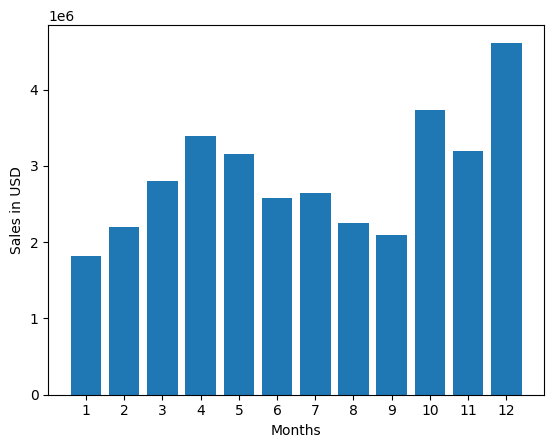

In [27]:
import matplotlib.pyplot as  plt
months = range(1,13)
plt.bar(months, sales_per_month["Total Sale"])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in USD")

### What city sold most product?

In [28]:
def getCity(add):
    splitted = str(add).split(',')
    return splitted[1].strip() + splitted[2][:3]

sales["City"] = sales.apply(lambda x: getCity(x["Purchase Address"]), axis=1)
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Sale,City
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",01,11.99,New York City NY
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",01,11.95,San Francisco CA
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",01,150.00,New York City NY
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",01,2.99,Dallas TX
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",01,23.90,Atlanta GA


Index(['Atlanta GA', 'Austin TX', 'Boston MA', 'Dallas TX', 'Los Angeles CA',
       'New York City NY', 'Portland ME', 'Portland OR', 'San Francisco CA',
       'Seattle WA'],
      dtype='object', name='City') [2795498.58 1819581.75 3661642.01 2767975.4  5452570.8  4664317.43
  449758.27 1870732.34 8262203.91 2747755.48]


,Total Sale
City,
San Francisco CA,8262203.91


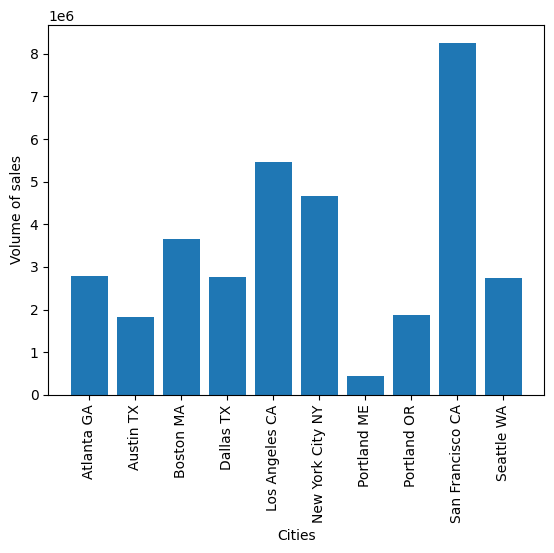

In [35]:
sale_volume_by_city = sales.groupby("City").agg({"Total Sale": "sum"})

cities = sale_volume_by_city.index
sales_volume = sale_volume_by_city.values.ravel()

print(cities, sales_volume)

plt.xticks(rotation=90)
plt.bar(cities,sales_volume)
plt.xlabel("Cities")
plt.ylabel("Volume of sales")

sale_volume_by_city.loc[sale_volume_by_city.idxmax()]

### What time should we display advertisements to maximize likelihood of customer buying product?

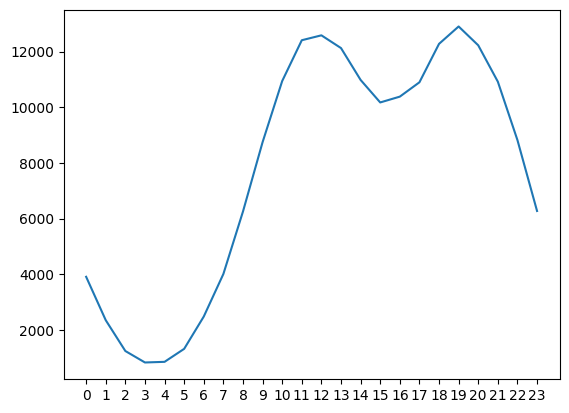

,Total Sale
Order Time,
19,12905


In [66]:
sales["Order Time"] = sales["Order Date"].apply(lambda x: x.hour)
order_by_time = sales.groupby("Order Time").agg({"Total Sale": "count"}).sort_index()

plt.plot(order_by_time)
plt.xticks(order_by_time.index)
plt.show()

order_by_time.loc[order_by_time.idxmax()]

### What products are most often sold together?

In [132]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Sale,City,Order Time
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",01,11.99,New York City NY,3
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",01,11.95,San Francisco CA,3
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",01,150.00,New York City NY,4
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",01,2.99,Dallas TX,5
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",01,23.90,Atlanta GA,6


In [136]:
duplicated_orders = sales[sales["Order ID"].duplicated(keep=False)]
unique_orders = duplicated_orders.groupby("Order ID")["Product"].transform(lambda x: ', '.join(x))
unique_orders

3764                              Wired Headphones, iPhone
3763                              Wired Headphones, iPhone
7189                    Google Phone, USB-C Charging Cable
7190                    Google Phone, USB-C Charging Cable
7576                      iPhone, Lightning Charging Cable
                               ...                        
16445                     Apple Airpods Headphones, iPhone
2266                      Lightning Charging Cable, iPhone
2265                      Lightning Charging Cable, iPhone
5103     Bose SoundSport Headphones, Lightning Charging...
5104     Bose SoundSport Headphones, Lightning Charging...
Name: Product, Length: 14649, dtype: object

In [147]:
from collections import Counter
from itertools import combinations

count = Counter()
    
for products in unique_orders:
    count.update(Counter(combinations([x.strip() for x in products.split(',')], 2)))
    
print(count.most_common(10))

[(('iPhone', 'Lightning Charging Cable'), 1100), (('Google Phone', 'USB-C Charging Cable'), 1071), (('USB-C Charging Cable', 'Google Phone'), 1069), (('Lightning Charging Cable', 'iPhone'), 1061), (('iPhone', 'Wired Headphones'), 520), (('Wired Headphones', 'iPhone'), 500), (('Wired Headphones', 'Google Phone'), 498), (('Google Phone', 'Wired Headphones'), 472), (('iPhone', 'Apple Airpods Headphones'), 424), (('Vareebadd Phone', 'USB-C Charging Cable'), 410)]


### What product sold the most and why?

In [148]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Sale,City,Order Time
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",01,11.99,New York City NY,3
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",01,11.95,San Francisco CA,3
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",01,150.00,New York City NY,4
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",01,2.99,Dallas TX,5
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",01,23.90,Atlanta GA,6


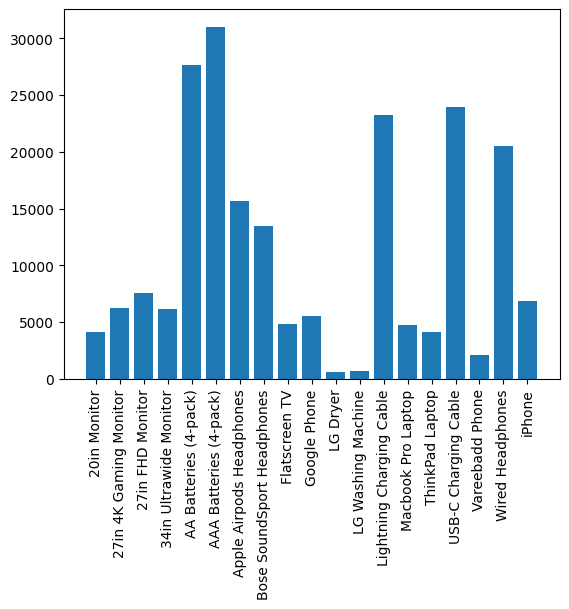

In [161]:
most_sold_products = sales.groupby("Product")["Quantity Ordered"].sum()
plt.bar(most_sold_products.index, most_sold_products.values)
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_438948/3766305011.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_with_price.index, rotation=90)


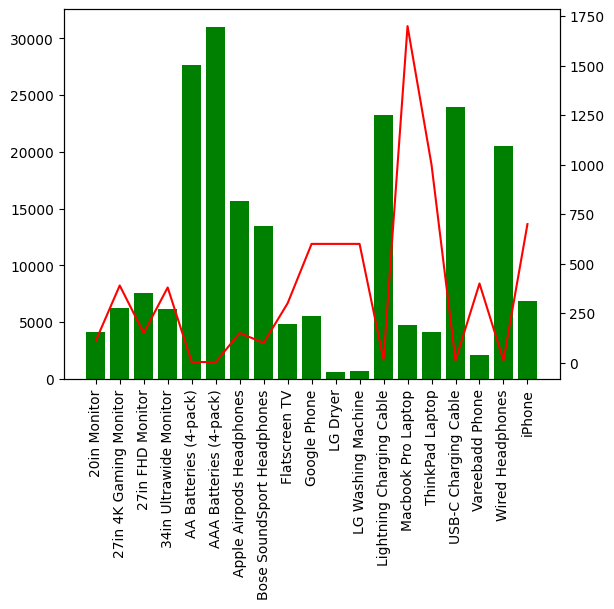

In [170]:
products_with_price = sales.groupby("Product")["Price Each"].mean()
products_with_price

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(most_sold_products.index, most_sold_products.values, color="g")
ax2.plot(products_with_price, color="r")
ax1.set_xticklabels(products_with_price.index, rotation=90)
plt.show()